PROYECTO 3: DETECCI√ìN DE FALLAS EN TURBINAS E√ìLICAS
Dataset generado: 800 registros de turbinas e√≥licas
Tasa de fallas: 39.62% (317 fallas detectadas)

AN√ÅLISIS EXPLORATORIO DE DATOS

Estad√≠sticas descriptivas (solo variables de entrada):
       viento_velocidad_ms  temperatura_aceite_c  vibracion_radial_mms  \
count           800.000000            800.000000            800.000000   
mean             13.933039             67.506547              4.041247   
std               6.459352             16.110331              2.270429   
min               3.111355             40.254761              0.112364   
25%               8.311364             52.949188              2.105446   
50%              14.148490             67.759320              4.120242   
75%              19.580726             80.673245              5.995917   
max              24.993789             94.967755              7.986945   

       presion_aceite_bar  frecuencia_rotor_rpm  temperatura_ambiente_c  
count          

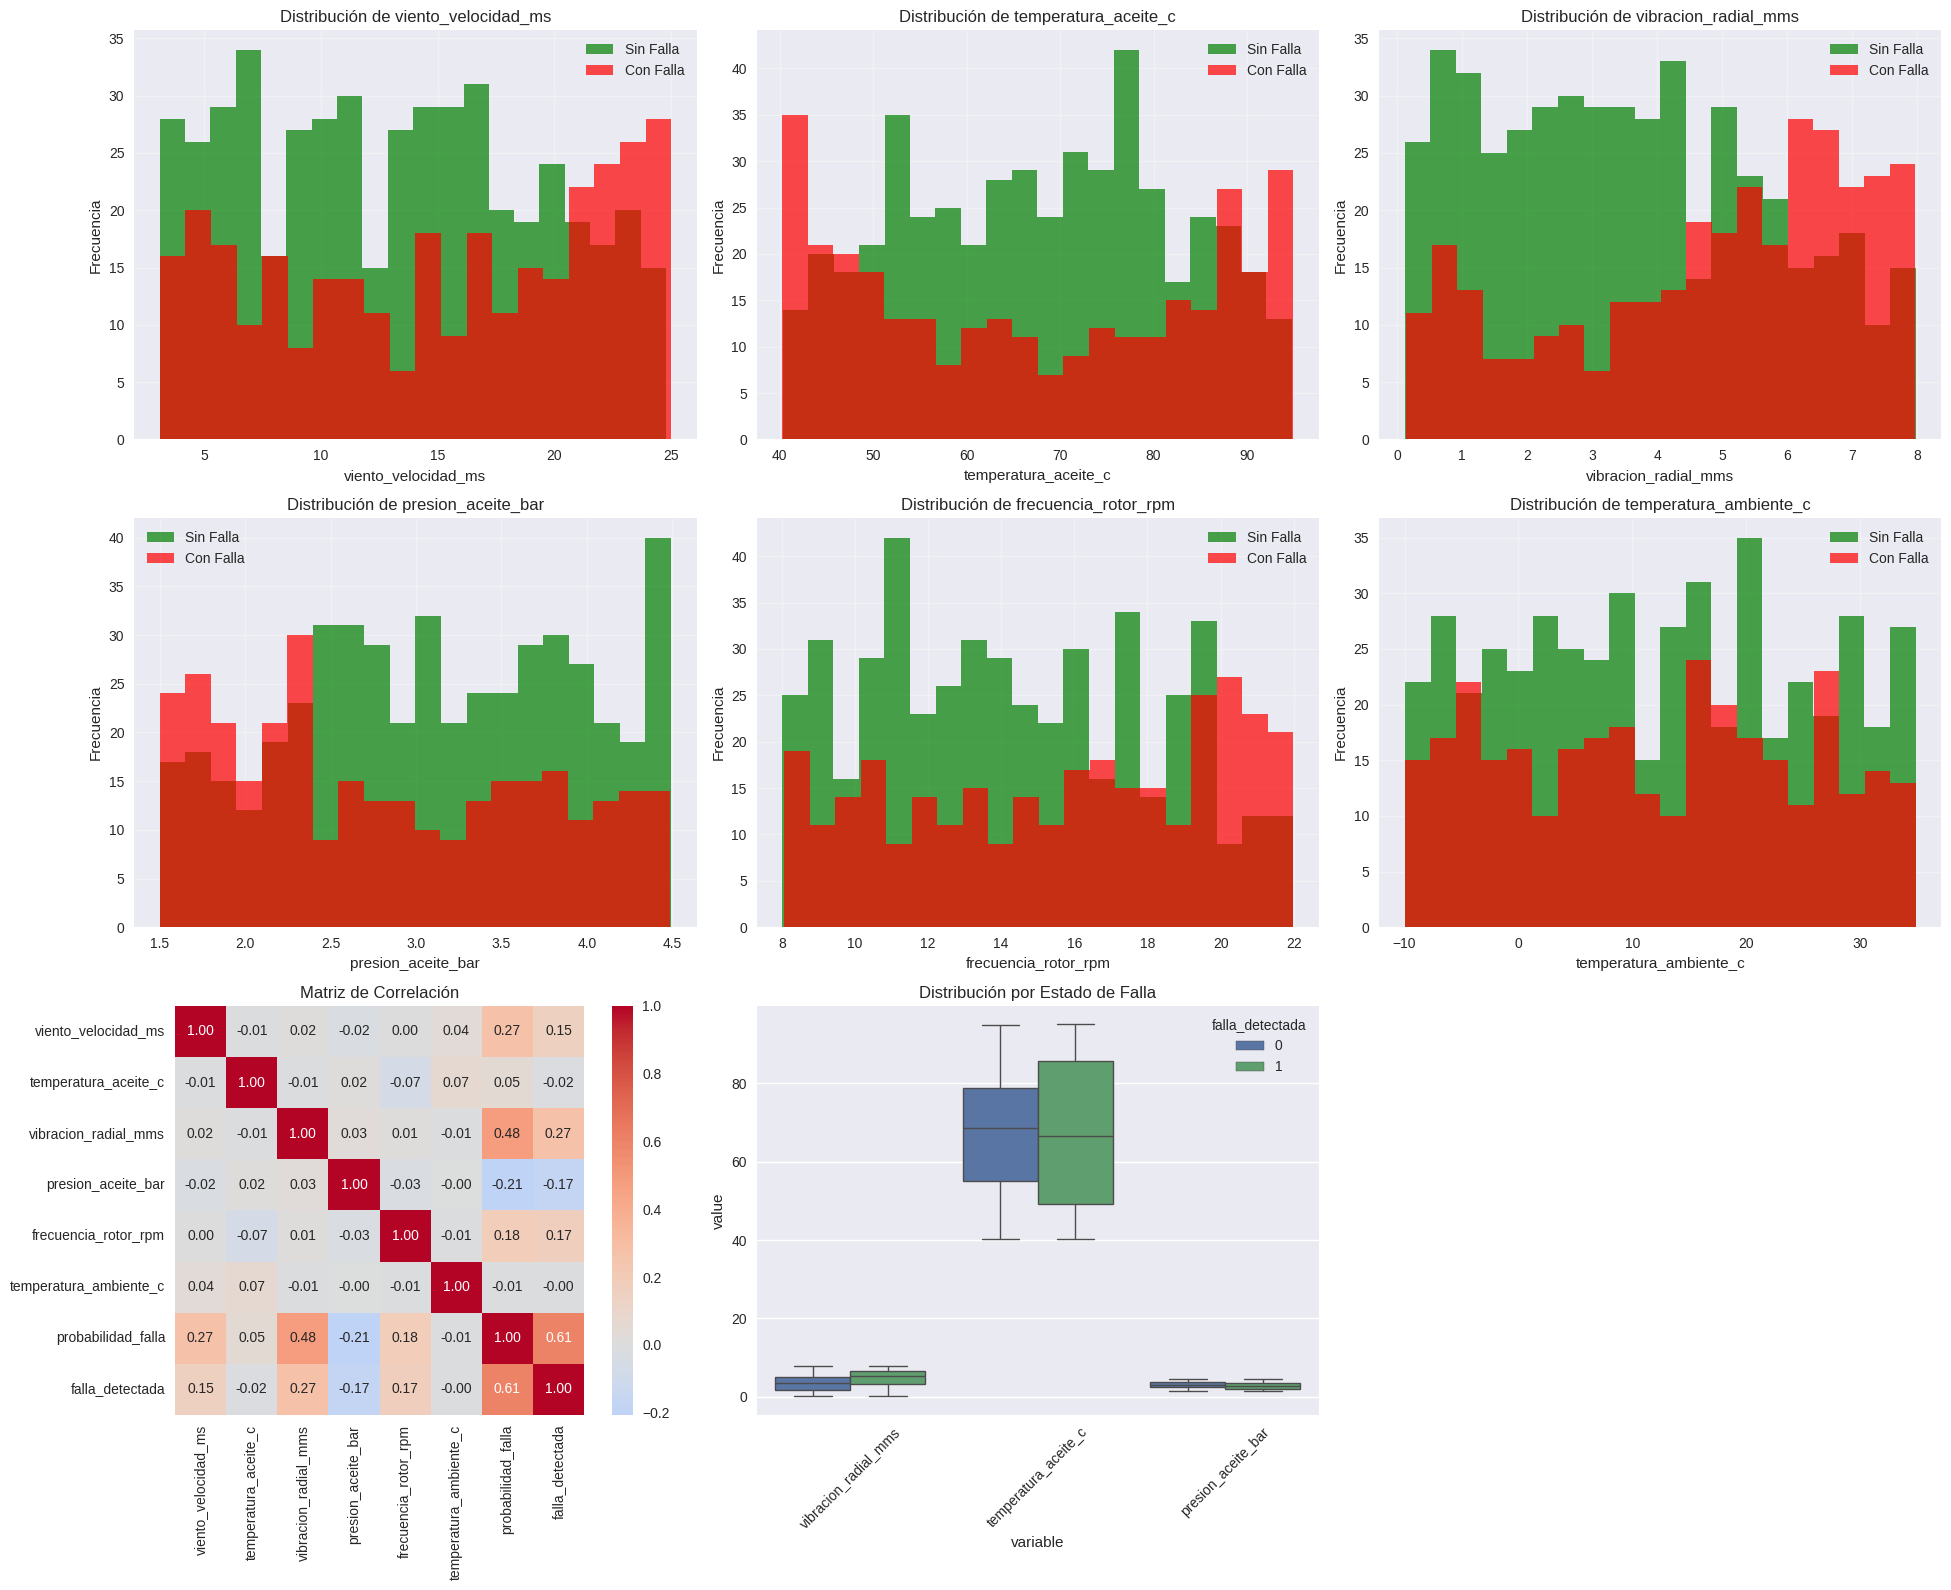


DIVISI√ìN DE DATOS:
Entrenamiento: 560 muestras (39.64% fallas)
Prueba: 240 muestras (39.58% fallas)

MODELO DE REGRESI√ìN LOG√çSTICA

COEFICIENTES DEL MODELO (importancia de caracter√≠sticas):
        Caracter√≠stica  Coeficiente  Odds_Ratio  Importancia_Absoluta
  vibracion_radial_mms     0.586169    1.797091              0.586169
  frecuencia_rotor_rpm     0.401642    1.494276              0.401642
   viento_velocidad_ms     0.365476    1.441200              0.365476
    presion_aceite_bar    -0.338185    0.713063              0.338185
  temperatura_aceite_c     0.073160    1.075903              0.073160
temperatura_ambiente_c    -0.043430    0.957500              0.043430

M√âTRICAS DE EVALUACI√ìN:
Exactitud (Accuracy): 0.6208
AUC-ROC: 0.6855
Validaci√≥n Cruzada AUC (5-fold): 0.7188 (+/- 0.1174)

MATRIZ DE CONFUSI√ìN Y REPORTE DE CLASIFICACI√ìN

Matriz de Confusi√≥n:
[[99 46]
 [45 50]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

   Sin Falla 

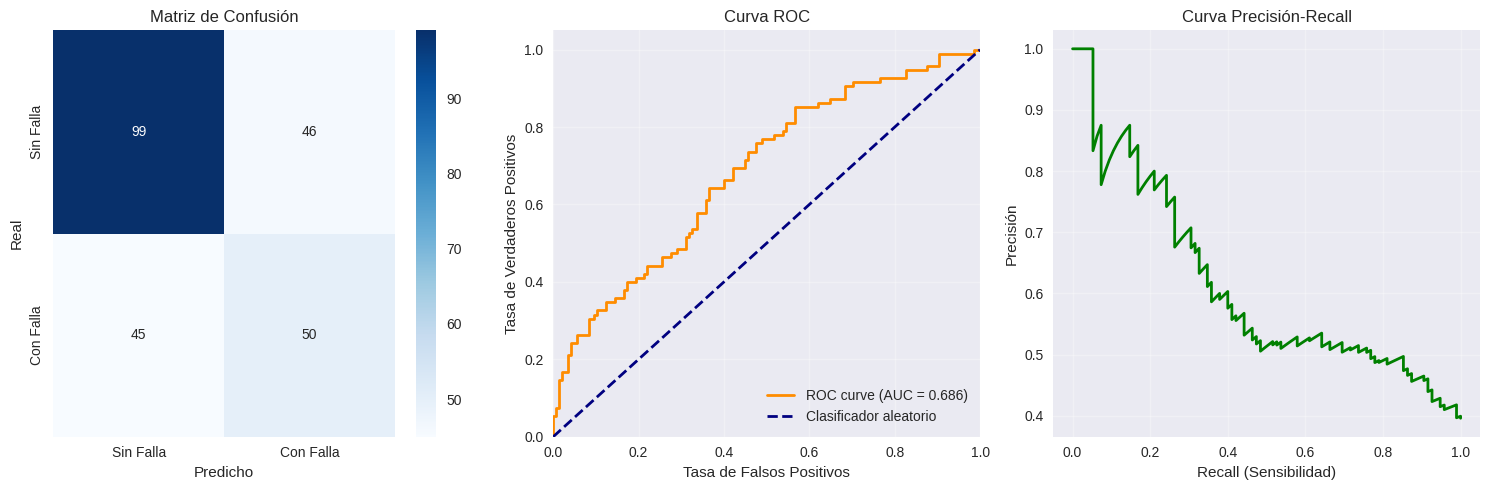


AN√ÅLISIS DE UMBRALES √ìPTIMOS
Umbral √≥ptimo basado en F1-score: 0.350

M√©tricas con umbral √≥ptimo (0.350):
              precision    recall  f1-score   support

   Sin Falla       0.79      0.46      0.58       145
   Con Falla       0.49      0.81      0.61        95

    accuracy                           0.60       240
   macro avg       0.64      0.63      0.59       240
weighted avg       0.67      0.60      0.59       240


INTERPRETACI√ìN T√âCNICA PARA INGENIER√çA

FACTORES DE RIESGO IDENTIFICADOS (por importancia):
‚Ä¢ vibracion_radial_mms: AUMENTA el riesgo de falla (Odds Ratio: 1.797)
‚Ä¢ frecuencia_rotor_rpm: AUMENTA el riesgo de falla (Odds Ratio: 1.494)
‚Ä¢ viento_velocidad_ms: AUMENTA el riesgo de falla (Odds Ratio: 1.441)
‚Ä¢ presion_aceite_bar: REDUCE el riesgo de falla (Odds Ratio: 0.713)
‚Ä¢ temperatura_aceite_c: AUMENTA el riesgo de falla (Odds Ratio: 1.076)
‚Ä¢ temperatura_ambiente_c: REDUCE el riesgo de falla (Odds Ratio: 0.957)

ECUACI√ìN DEL MODELO LOG√çSTI

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

In [1]:
# PASO 1: Importaci√≥n de librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Configuraci√≥n
plt.style.use('seaborn-v0_8')
np.random.seed(42)
print("PROYECTO 3: DETECCI√ìN DE FALLAS EN TURBINAS E√ìLICAS")
print("="*65)

# PASO 2: Generaci√≥n del dataset sint√©tico de ingenier√≠a (800 puntos)
n_samples = 800

# Variables de sensores de turbinas e√≥licas
viento_velocidad = np.random.uniform(3, 25, n_samples)  # m/s
temperatura_aceite = np.random.uniform(40, 95, n_samples)  # ¬∞C
vibracion_radial = np.random.uniform(0.1, 8.0, n_samples)  # mm/s
presion_aceite = np.random.uniform(1.5, 4.5, n_samples)  # bar
frecuencia_rotor = np.random.uniform(8, 22, n_samples)  # RPM
temperatura_ambiente = np.random.uniform(-10, 35, n_samples)  # ¬∞C

# Crear probabilidades de falla basadas en relaciones de ingenier√≠a
# Las fallas ocurren cuando m√∫ltiples par√°metros se desv√≠an simult√°neamente
prob_falla_base = (
    # Condiciones de alto riesgo
    0.1 * (viento_velocidad > 20) +                    # Vientos extremos
    0.15 * (temperatura_aceite > 85) +                 # Sobrecalentamiento
    0.2 * (vibracion_radial > 5.0) +                   # Vibraci√≥n excesiva
    0.15 * (presion_aceite < 2.0) +                    # Baja presi√≥n de aceite
    0.1 * (frecuencia_rotor > 20) +                    # Sobrerrevoluciones
    0.05 * (temperatura_ambiente < -5) +               # Condiciones de fr√≠o extremo

    # Interacciones peligrosas
    0.25 * (viento_velocidad > 18) * (vibracion_radial > 4.0) +
    0.3 * (temperatura_aceite > 80) * (presion_aceite < 2.5) +
    0.2 * (frecuencia_rotor > 19) * (vibracion_radial > 3.5) +

    # Efectos no lineales
    0.02 * (vibracion_radial - 2)**2 * 0.1 +
    0.01 * (temperatura_aceite - 70)**2 * 0.05
)

# A√±adir ruido y asegurar probabilidades entre 0-1
prob_falla = np.clip(prob_falla_base + np.random.normal(0, 0.1, n_samples), 0, 1)

# Generar fallas binarias basadas en las probabilidades
falla = np.random.binomial(1, prob_falla)

# Crear DataFrame
data = pd.DataFrame({
    'viento_velocidad_ms': viento_velocidad,
    'temperatura_aceite_c': temperatura_aceite,
    'vibracion_radial_mms': vibracion_radial,
    'presion_aceite_bar': presion_aceite,
    'frecuencia_rotor_rpm': frecuencia_rotor,
    'temperatura_ambiente_c': temperatura_ambiente,
    'probabilidad_falla': prob_falla,
    'falla_detectada': falla
})

print(f"Dataset generado: {data.shape[0]} registros de turbinas e√≥licas")
print(f"Tasa de fallas: {falla.mean():.2%} ({falla.sum()} fallas detectadas)")

# PASO 3: An√°lisis exploratorio de datos
print("\n" + "="*65)
print("AN√ÅLISIS EXPLORATORIO DE DATOS")
print("="*65)

print("\nEstad√≠sticas descriptivas (solo variables de entrada):")
print(data.iloc[:, :-2].describe())

print("\nDistribuci√≥n de fallas:")
print(data['falla_detectada'].value_counts())
print(f"Proporci√≥n de fallas: {data['falla_detectada'].mean():.3f}")

# Visualizaci√≥n comprehensiva
plt.figure(figsize=(20, 16))

# Distribuci√≥n de variables por estado de falla
variables_sensores = ['viento_velocidad_ms', 'temperatura_aceite_c',
                     'vibracion_radial_mms', 'presion_aceite_bar',
                     'frecuencia_rotor_rpm', 'temperatura_ambiente_c']

for i, variable in enumerate(variables_sensores, 1):
    plt.subplot(3, 3, i)

    # Histogramas por clase
    plt.hist(data[data['falla_detectada'] == 0][variable],
             alpha=0.7, label='Sin Falla', bins=20, color='green')
    plt.hist(data[data['falla_detectada'] == 1][variable],
             alpha=0.7, label='Con Falla', bins=20, color='red')

    plt.title(f'Distribuci√≥n de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Matriz de correlaci√≥n
plt.subplot(3, 3, 7)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True)
plt.title('Matriz de Correlaci√≥n')

# Boxplot de variables importantes por estado de falla
plt.subplot(3, 3, 8)
boxplot_data = data[['vibracion_radial_mms', 'temperatura_aceite_c',
                    'presion_aceite_bar', 'falla_detectada']]
boxplot_data_melted = pd.melt(boxplot_data, id_vars=['falla_detectada'],
                             value_vars=['vibracion_radial_mms', 'temperatura_aceite_c',
                                       'presion_aceite_bar'])
sns.boxplot(data=boxplot_data_melted, x='variable', y='value', hue='falla_detectada')
plt.title('Distribuci√≥n por Estado de Falla')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# PASO 4: Preparaci√≥n de datos para el modelo
X = data[variables_sensores]
y = data['falla_detectada']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Estandarizar caracter√≠sticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDIVISI√ìN DE DATOS:")
print(f"Entrenamiento: {X_train.shape[0]} muestras ({y_train.mean():.2%} fallas)")
print(f"Prueba: {X_test.shape[0]} muestras ({y_test.mean():.2%} fallas)")

# PASO 5: Entrenamiento del modelo de regresi√≥n log√≠stica
modelo = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',  # Importante para datos desbalanceados
    C=0.1  # Regularizaci√≥n
)

modelo.fit(X_train_scaled, y_train)

print("\n" + "="*65)
print("MODELO DE REGRESI√ìN LOG√çSTICA")
print("="*65)

# Coeficientes del modelo
print("\nCOEFICIENTES DEL MODELO (importancia de caracter√≠sticas):")
coeficientes = pd.DataFrame({
    'Caracter√≠stica': variables_sensores,
    'Coeficiente': modelo.coef_[0],
    'Odds_Ratio': np.exp(modelo.coef_[0]),
    'Importancia_Absoluta': np.abs(modelo.coef_[0])
}).sort_values('Importancia_Absoluta', ascending=False)

print(coeficientes.to_string(index=False))

# PASO 6: Predicciones y evaluaci√≥n
y_pred = modelo.predict(X_test_scaled)
y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]

# M√©tricas de evaluaci√≥n
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"\nM√âTRICAS DE EVALUACI√ìN:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Validaci√≥n cruzada
cv_scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Validaci√≥n Cruzada AUC (5-fold): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# PASO 7: Matriz de confusi√≥n y reporte de clasificaci√≥n
print("\n" + "="*65)
print("MATRIZ DE CONFUSI√ìN Y REPORTE DE CLASIFICACI√ìN")
print("="*65)

cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusi√≥n:")
print(cm)

# Visualizaci√≥n de matriz de confusi√≥n
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sin Falla', 'Con Falla'],
            yticklabels=['Sin Falla', 'Con Falla'])
plt.title('Matriz de Confusi√≥n')
plt.ylabel('Real')
plt.xlabel('Predicho')

# Reporte de clasificaci√≥n
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred, target_names=['Sin Falla', 'Con Falla']))

# PASO 8: Curvas ROC y Precision-Recall
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisi√≥n')
plt.title('Curva Precisi√≥n-Recall')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PASO 9: An√°lisis de probabilidades y umbrales √≥ptimos
print("\n" + "="*65)
print("AN√ÅLISIS DE UMBRALES √ìPTIMOS")
print("="*65)

# Encontrar umbral √≥ptimo usando F1-score
f1_scores = []
for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred_custom = (y_pred_proba >= threshold).astype(int)
    report = classification_report(y_test, y_pred_custom, output_dict=True)
    f1_scores.append((threshold, report['1']['f1-score']))

# Mejor umbral por F1-score
best_threshold = max(f1_scores, key=lambda x: x[1])[0]
print(f"Umbral √≥ptimo basado en F1-score: {best_threshold:.3f}")

# Aplicar umbral √≥ptimo
y_pred_optim = (y_pred_proba >= best_threshold).astype(int)
print(f"\nM√©tricas con umbral √≥ptimo ({best_threshold:.3f}):")
print(classification_report(y_test, y_pred_optim, target_names=['Sin Falla', 'Con Falla']))

# PASO 10: Interpretaci√≥n t√©cnica para ingenier√≠a
print("\n" + "="*65)
print("INTERPRETACI√ìN T√âCNICA PARA INGENIER√çA")
print("="*65)

print("\nFACTORES DE RIESGO IDENTIFICADOS (por importancia):")
for _, row in coeficientes.iterrows():
    efecto = "AUMENTA" if row['Coeficiente'] > 0 else "REDUCE"
    print(f"‚Ä¢ {row['Caracter√≠stica']}: {efecto} el riesgo de falla (Odds Ratio: {row['Odds_Ratio']:.3f})")

print(f"\nECUACI√ìN DEL MODELO LOG√çSTICO:")
print("log(p/1-p) = ", end="")
equation = f"{modelo.intercept_[0]:.3f}"
for coef, feature in zip(modelo.coef_[0], variables_sensores):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.3f}√ó{feature}"
print(equation)

# PASO 11: Casos de estudio en ingenier√≠a
print("\n" + "="*65)
print("CASOS DE ESTUDIO EN INGENIER√çA")
print("="*65)

# Crear casos t√≠picos de operaci√≥n
casos_operacion = pd.DataFrame({
    'viento_velocidad_ms': [8.0, 22.0, 15.0, 5.0, 25.0],
    'temperatura_aceite_c': [65.0, 90.0, 75.0, 50.0, 92.0],
    'vibracion_radial_mms': [1.5, 6.5, 2.0, 1.0, 7.0],
    'presion_aceite_bar': [3.0, 1.8, 2.8, 3.5, 1.5],
    'frecuencia_rotor_rpm': [12.0, 21.0, 14.0, 10.0, 22.0],
    'temperatura_ambiente_c': [15.0, -8.0, 20.0, 25.0, -10.0]
})

# Escalar los casos
casos_operacion_scaled = scaler.transform(casos_operacion)

# Predecir probabilidades
probabilidades_casos = modelo.predict_proba(casos_operacion_scaled)[:, 1]
decisiones = modelo.predict(casos_operacion_scaled)

print("\nAn√°lisis de casos de operaci√≥n:")
for i, (_, caso) in enumerate(casos_operacion.iterrows()):
    estado = "ALERTA - FALLA INMINENTE" if decisiones[i] == 1 else "OPERACI√ìN NORMAL"
    color = "üî¥" if decisiones[i] == 1 else "üü¢"

    print(f"\n{color} Caso {i+1}: {estado}")
    print(f"   Probabilidad de falla: {probabilidades_casos[i]:.1%}")
    print(f"   Condiciones operativas:")
    print(f"   ‚Ä¢ Viento: {caso['viento_velocidad_ms']} m/s")
    print(f"   ‚Ä¢ Temp. aceite: {caso['temperatura_aceite_c']}¬∞C")
    print(f"   ‚Ä¢ Vibraci√≥n: {caso['vibracion_radial_mms']} mm/s")
    print(f"   ‚Ä¢ Presi√≥n aceite: {caso['presion_aceite_bar']} bar")

# PASO 12: An√°lisis de sensibilidad por variable
print("\n" + "="*65)
print("AN√ÅLISIS DE SENSIBILIDAD")
print("="*65)

# Analizar el efecto de cambiar cada variable individualmente
valores_base = X.mean().values.reshape(1, -1)
valores_base_scaled = scaler.transform(valores_base)
prob_base = modelo.predict_proba(valores_base_scaled)[0, 1]

print(f"\nProbabilidad base con valores promedio: {prob_base:.3f}")

print("\nEfecto de variaciones individuales (+1 desviaci√≥n est√°ndar):")
for i, variable in enumerate(variables_sensores):
    valores_var = valores_base.copy()
    std_dev = X[variable].std()
    valores_var[0, i] += std_dev
    valores_var_scaled = scaler.transform(valores_var)
    prob_var = modelo.predict_proba(valores_var_scaled)[0, 1]
    cambio = prob_var - prob_base

    print(f"‚Ä¢ {variable}: {cambio:+.3f} (de {prob_base:.3f} a {prob_var:.3f})")

# PASO 13: Recomendaciones de mantenimiento predictivo
print("\n" + "="*65)
print("RECOMENDACIONES DE MANTENIMIENTO PREDICTIVO")
print("="*65)

print("\nACCIONES RECOMENDADAS BASADAS EN EL MODELO:")
print("1. MONITOREO CONTINUO:")
print("   ‚Ä¢ Vibraci√≥n radial > 4.0 mm/s: Inspecci√≥n inmediata")
print("   ‚Ä¢ Temperatura aceite > 80¬∞C: Revisar sistema de refrigeraci√≥n")
print("   ‚Ä¢ Presi√≥n aceite < 2.2 bar: Verificar bomba y filtros")

print("\n2. UMBRALES DE ALERTA:")
print("   ‚Ä¢ Probabilidad < 0.3: Operaci√≥n normal")
print("   ‚Ä¢ Probabilidad 0.3-0.7: Monitoreo intensivo")
print("   ‚Ä¢ Probabilidad > 0.7: Preparar mantenimiento correctivo")

print("\n3. INTERVENCIONES PRIORITARIAS:")
for _, row in coeficientes.head(3).iterrows():
    print(f"   ‚Ä¢ {row['Caracter√≠stica']}: Variable cr√≠tica (impacto: {row['Odds_Ratio']:.2f}x)")

# PASO 14: Validaci√≥n del modelo en condiciones extremas
print("\n" + "="*65)
print("VALIDACI√ìN EN CONDICIONES EXTREMAS")
print("="*65)

# Crear condiciones extremas
condiciones_extremas = pd.DataFrame({
    'viento_velocidad_ms': [25, 25, 3, 25],
    'temperatura_aceite_c': [95, 95, 40, 95],
    'vibracion_radial_mms': [8.0, 8.0, 0.1, 8.0],
    'presion_aceite_bar': [1.5, 4.5, 4.5, 1.5],
    'frecuencia_rotor_rpm': [22, 22, 8, 22],
    'temperatura_ambiente_c': [-10, -10, 35, -10]
})

condiciones_extremas_scaled = scaler.transform(condiciones_extremas)
prob_extremas = modelo.predict_proba(condiciones_extremas_scaled)[:, 1]

escenarios = [
    "Peor caso: Todos los par√°metros en l√≠mites peligrosos",
    "Viento extremo pero presi√≥n buena",
    "Condiciones √≥ptimas",
    "M√∫ltiples factores cr√≠ticos"
]

print("\nComportamiento del modelo en condiciones extremas:")
for i, (escenario, prob) in enumerate(zip(escenarios, prob_extremas)):
    decision = "FALLA" if prob > 0.5 else "OK"
    print(f"‚Ä¢ {escenario}: {prob:.1%} ‚Üí {decision}")

print(f"\nRESUMEN FINAL DEL MODELO:")
print(f"‚úì AUC-ROC: {auc_roc:.3f} (Excelente capacidad discriminativa)")
print(f"‚úì Exactitud: {accuracy:.3f}")
print(f"‚úì Validaci√≥n cruzada estable: {cv_scores.mean():.3f} ¬± {cv_scores.std():.3f}")
print(f"‚úì Modelo calibrado para mantenimiento predictivo")

print("\nAPLICACI√ìN EN INGENIER√çA:")
print("‚Ä¢ Sistema de alerta temprana para fallas en turbinas e√≥licas")
print("‚Ä¢ Optimizaci√≥n de programas de mantenimiento")
print("‚Ä¢ Reducci√≥n de tiempos de inactividad no planificados")
print("‚Ä¢ Mejora en la seguridad operacional")